### Initialization

In [10]:

import numpy as np
import matplotlib.pyplot as plt
import pickle


### Figure rendering

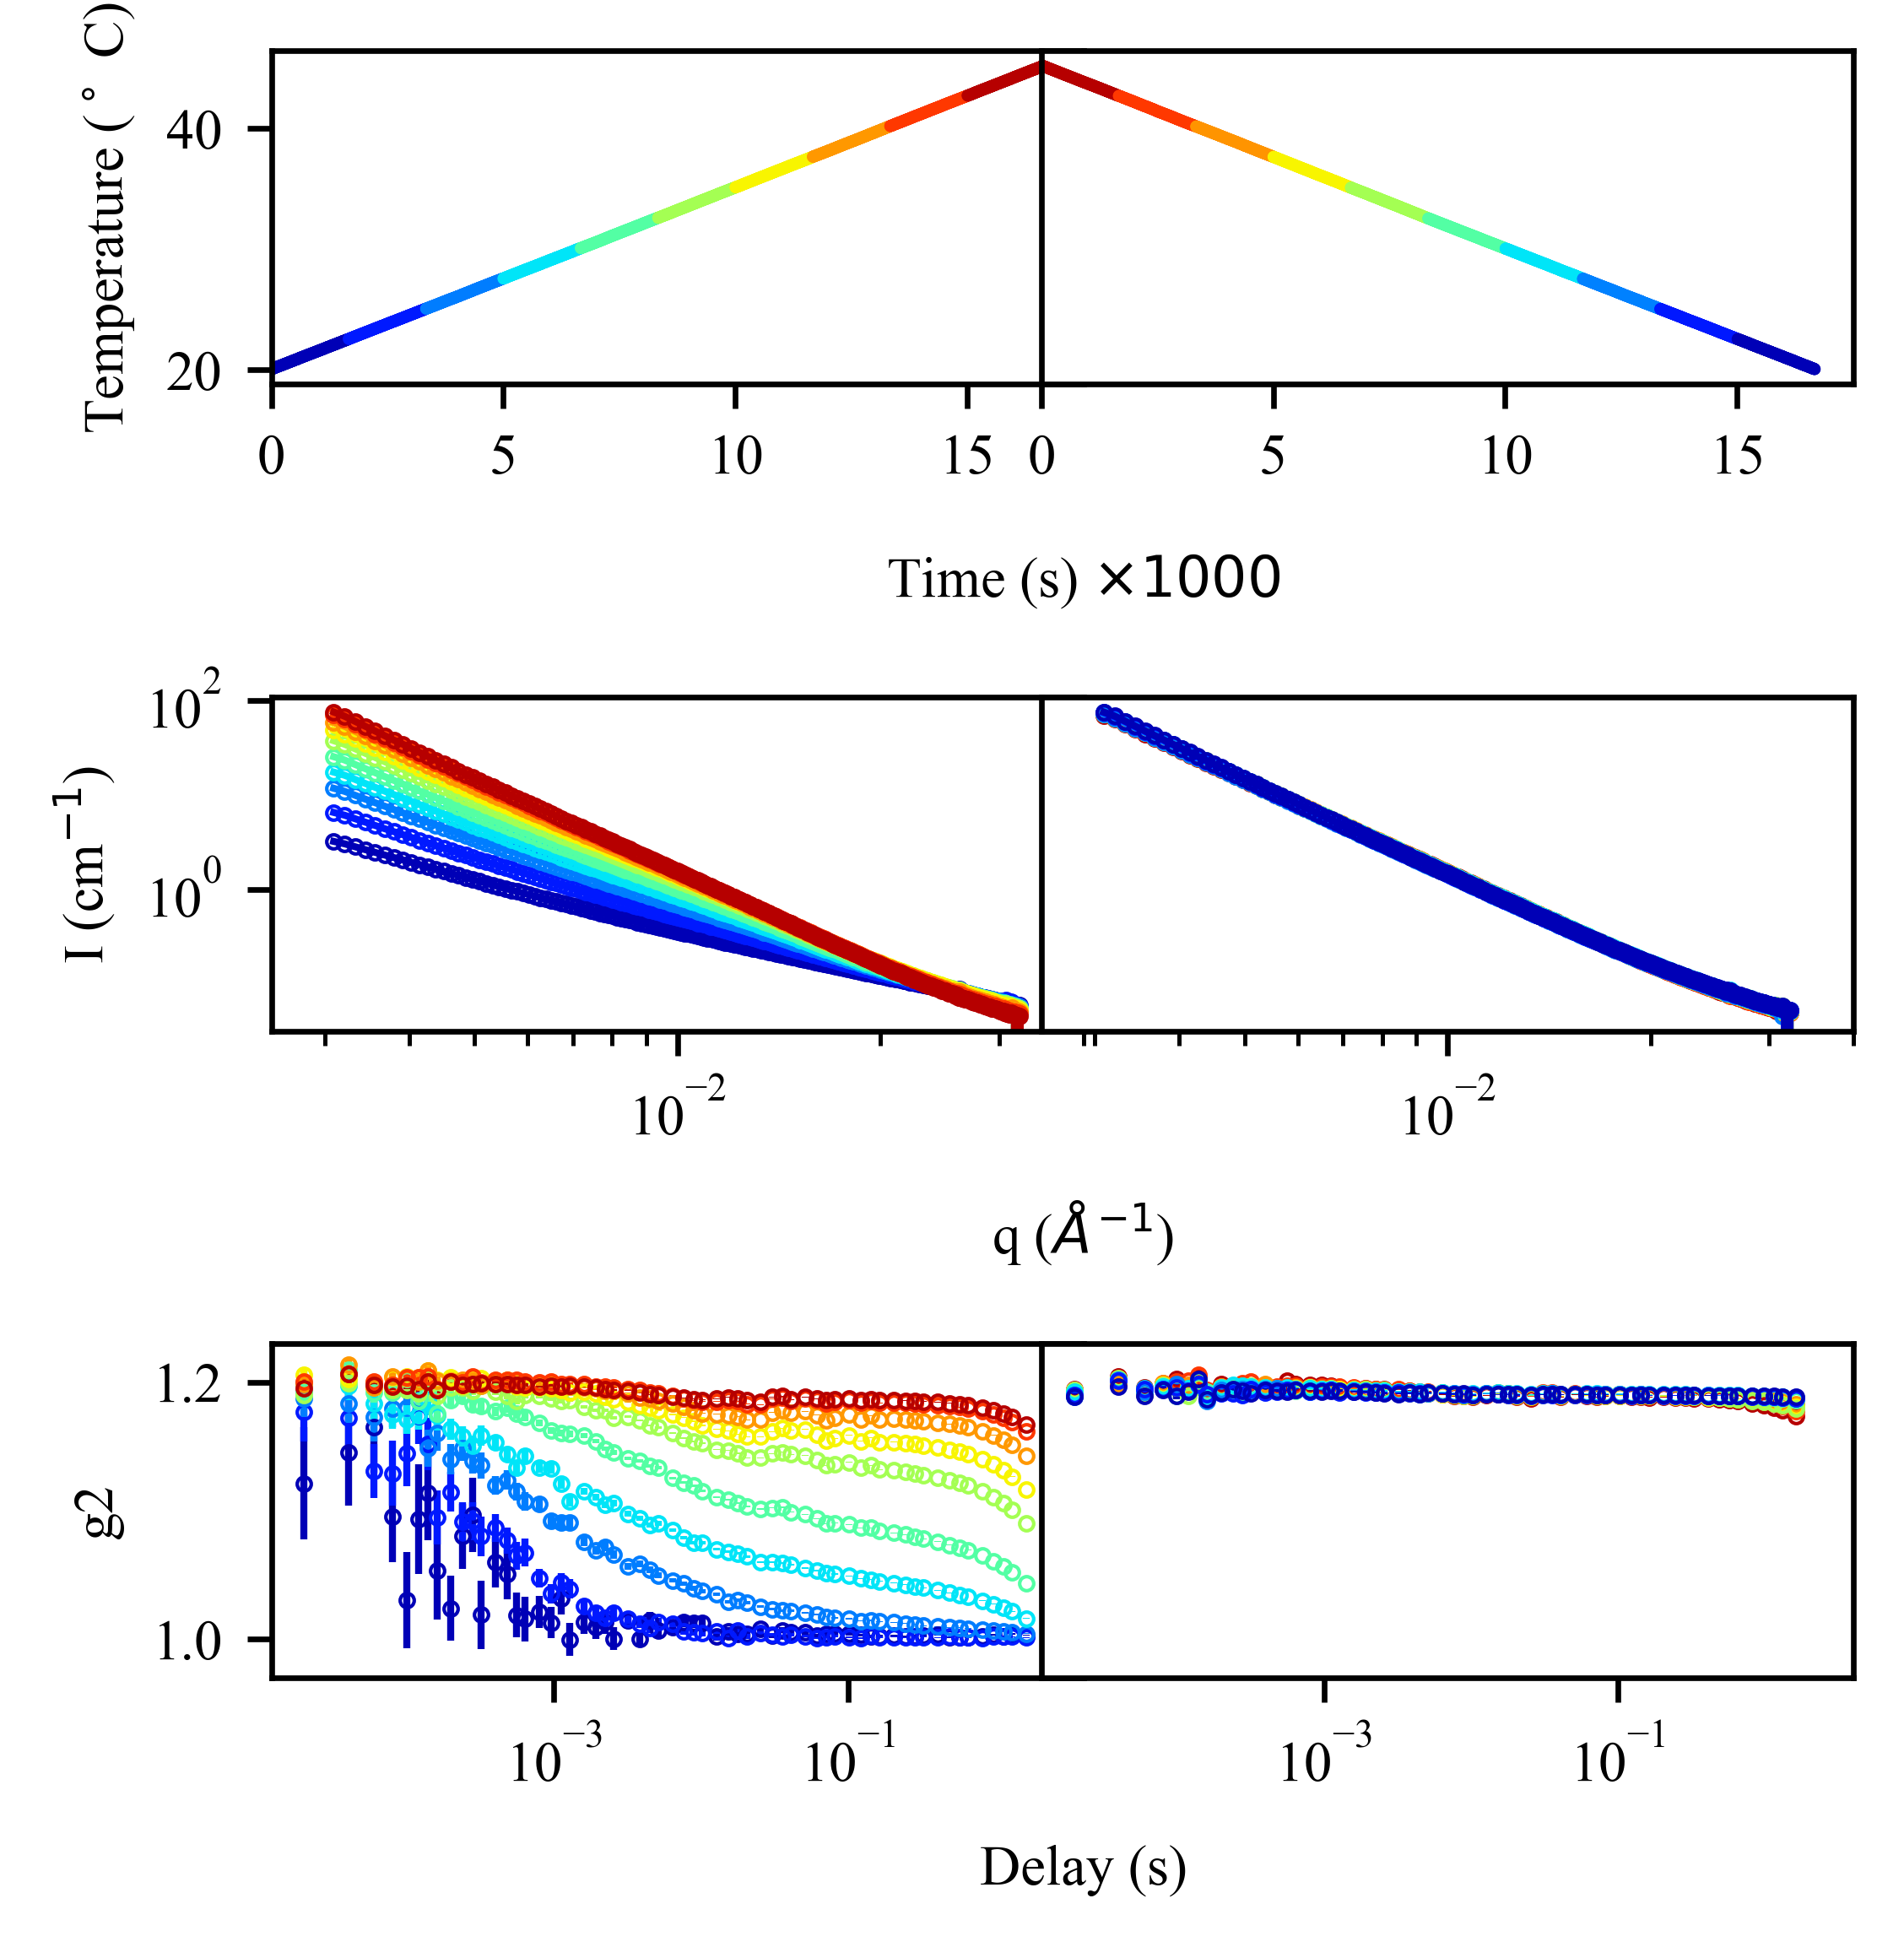

In [11]:

with open('checkpoint.pickle', 'rb') as f:  # 'rb' for binary read mode
    avg_ramp_up = pickle.load(f)  # Load the object from the file
    avg_ramp_down = pickle.load(f)
    t_el = pickle.load(f)
    ql_sta = pickle.load(f)
    ql_dyn = pickle.load(f)

plt.rcParams['pdf.fonttype'] = 42
# plt.rcParams['font.sans-serif'] = 'Helvetica'   # not installed on tanzanite
# plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 600


fig, ax = plt.subplots(3, 2, figsize=(3.8, 4.0))
for n in range(3):
    ax[n, 1].get_yaxis().set_visible(False)
    # ax[n, 0].xaxis.set_label_coords(0.9, -0.25)


def plot_one_column(ax, avg_data_list, second_column=False, g2_idx=0):
    total_size = 0
    for avg_dict in avg_data_list:
        total_size += len(avg_dict['temperature_x'])

    if second_column:
        cmap = plt.get_cmap('jet_r')
    else:
        cmap = plt.get_cmap('jet')
    
    accu_size = 0
    for avg_dict in avg_data_list:
        curr_size = len(avg_dict['temperature_x'])
        idx = accu_size + np.arange(curr_size) * 1.0
        idx /= total_size
        accu_size += curr_size
        # print(idx.shape, np.min(idx), np.max(idx))
        # ax[0].plot(avg_dict['temperature_x'], avg_dict['temperature'], color=idx, cmap=plt.cm.jet)
        
        ax[0].scatter(avg_dict['temperature_x'] * 6 / 1000, avg_dict['temperature'], 
                      c=cmap(np.ones_like(idx)*np.mean(idx)), s=0.5)

        color = cmap(np.mean(idx))
        # have to remove the last few points
        ax[1].loglog(ql_sta[:-15], avg_dict['saxs_1d'][:-15], 'o-', color=color, lw=1, ms=2, mew=0.5, mfc='none')
        
        ax[2].errorbar(t_el, avg_dict['g2'][:, g2_idx],  yerr=avg_dict['g2_err'][:, g2_idx],
                       fmt='o', color=color, lw=1, ms=2, mew=0.5, mfc='none')
        # g2_line = avg_dict['g2'][:, g2_idx]
        # if np.sum((g2_line > 1.2) | (g2_line < 0.9)) < 5:
        #     ax[2].errorbar(t_el, avg_dict['g2'][:, g2_idx], yerr=avg_dict['g2_err'][:, g2_idx], 
        #                    fmt='o', color=color, lw=1, ms=2, mew=0.5, mfc='none')
        #     ax[2].set_ylim(0.97, 1.23)
        # x, y, yerr=None, xerr=None, fmt='', ecolor=None,
    ax[2].set_ylim(0.97, 1.23)
    
    if not second_column:
        ax[0].set_ylabel('Temperature ($^\circ$ C)')
        ax[1].set_ylabel('I (cm$^{-1}$)')
        ax[2].set_ylabel('g2')

        ax[0].set_xlabel('Time (s) $\\times 1000$')
        ax[1].set_xlabel('q ($\\AA^{-1}$)')
        ax[2].set_xlabel('Delay (s)')
        ax[0].xaxis.set_label_coords(1.0, -0.5)
        ax[1].xaxis.set_label_coords(1.0, -0.5)
        ax[2].xaxis.set_label_coords(1.0, -0.5)

    # additional setup
    ax[0].set_xlim(0, None)
    ax[2].set_xscale('log')

    ax[1].set_xlim(2.5e-3, 4e-2)
    ax[2].set_xlim(1.2e-5, 4e0)

plot_one_column(ax[:, 0], avg_ramp_up)
plot_one_column(ax[:, 1], avg_ramp_down, second_column=True)
 
plt.tight_layout(w_pad=-1, h_pad=0.125)
# plt.savefig('figure3.png', dpi=300)
plt.savefig('H02.pdf')
# plt.tight_layout()

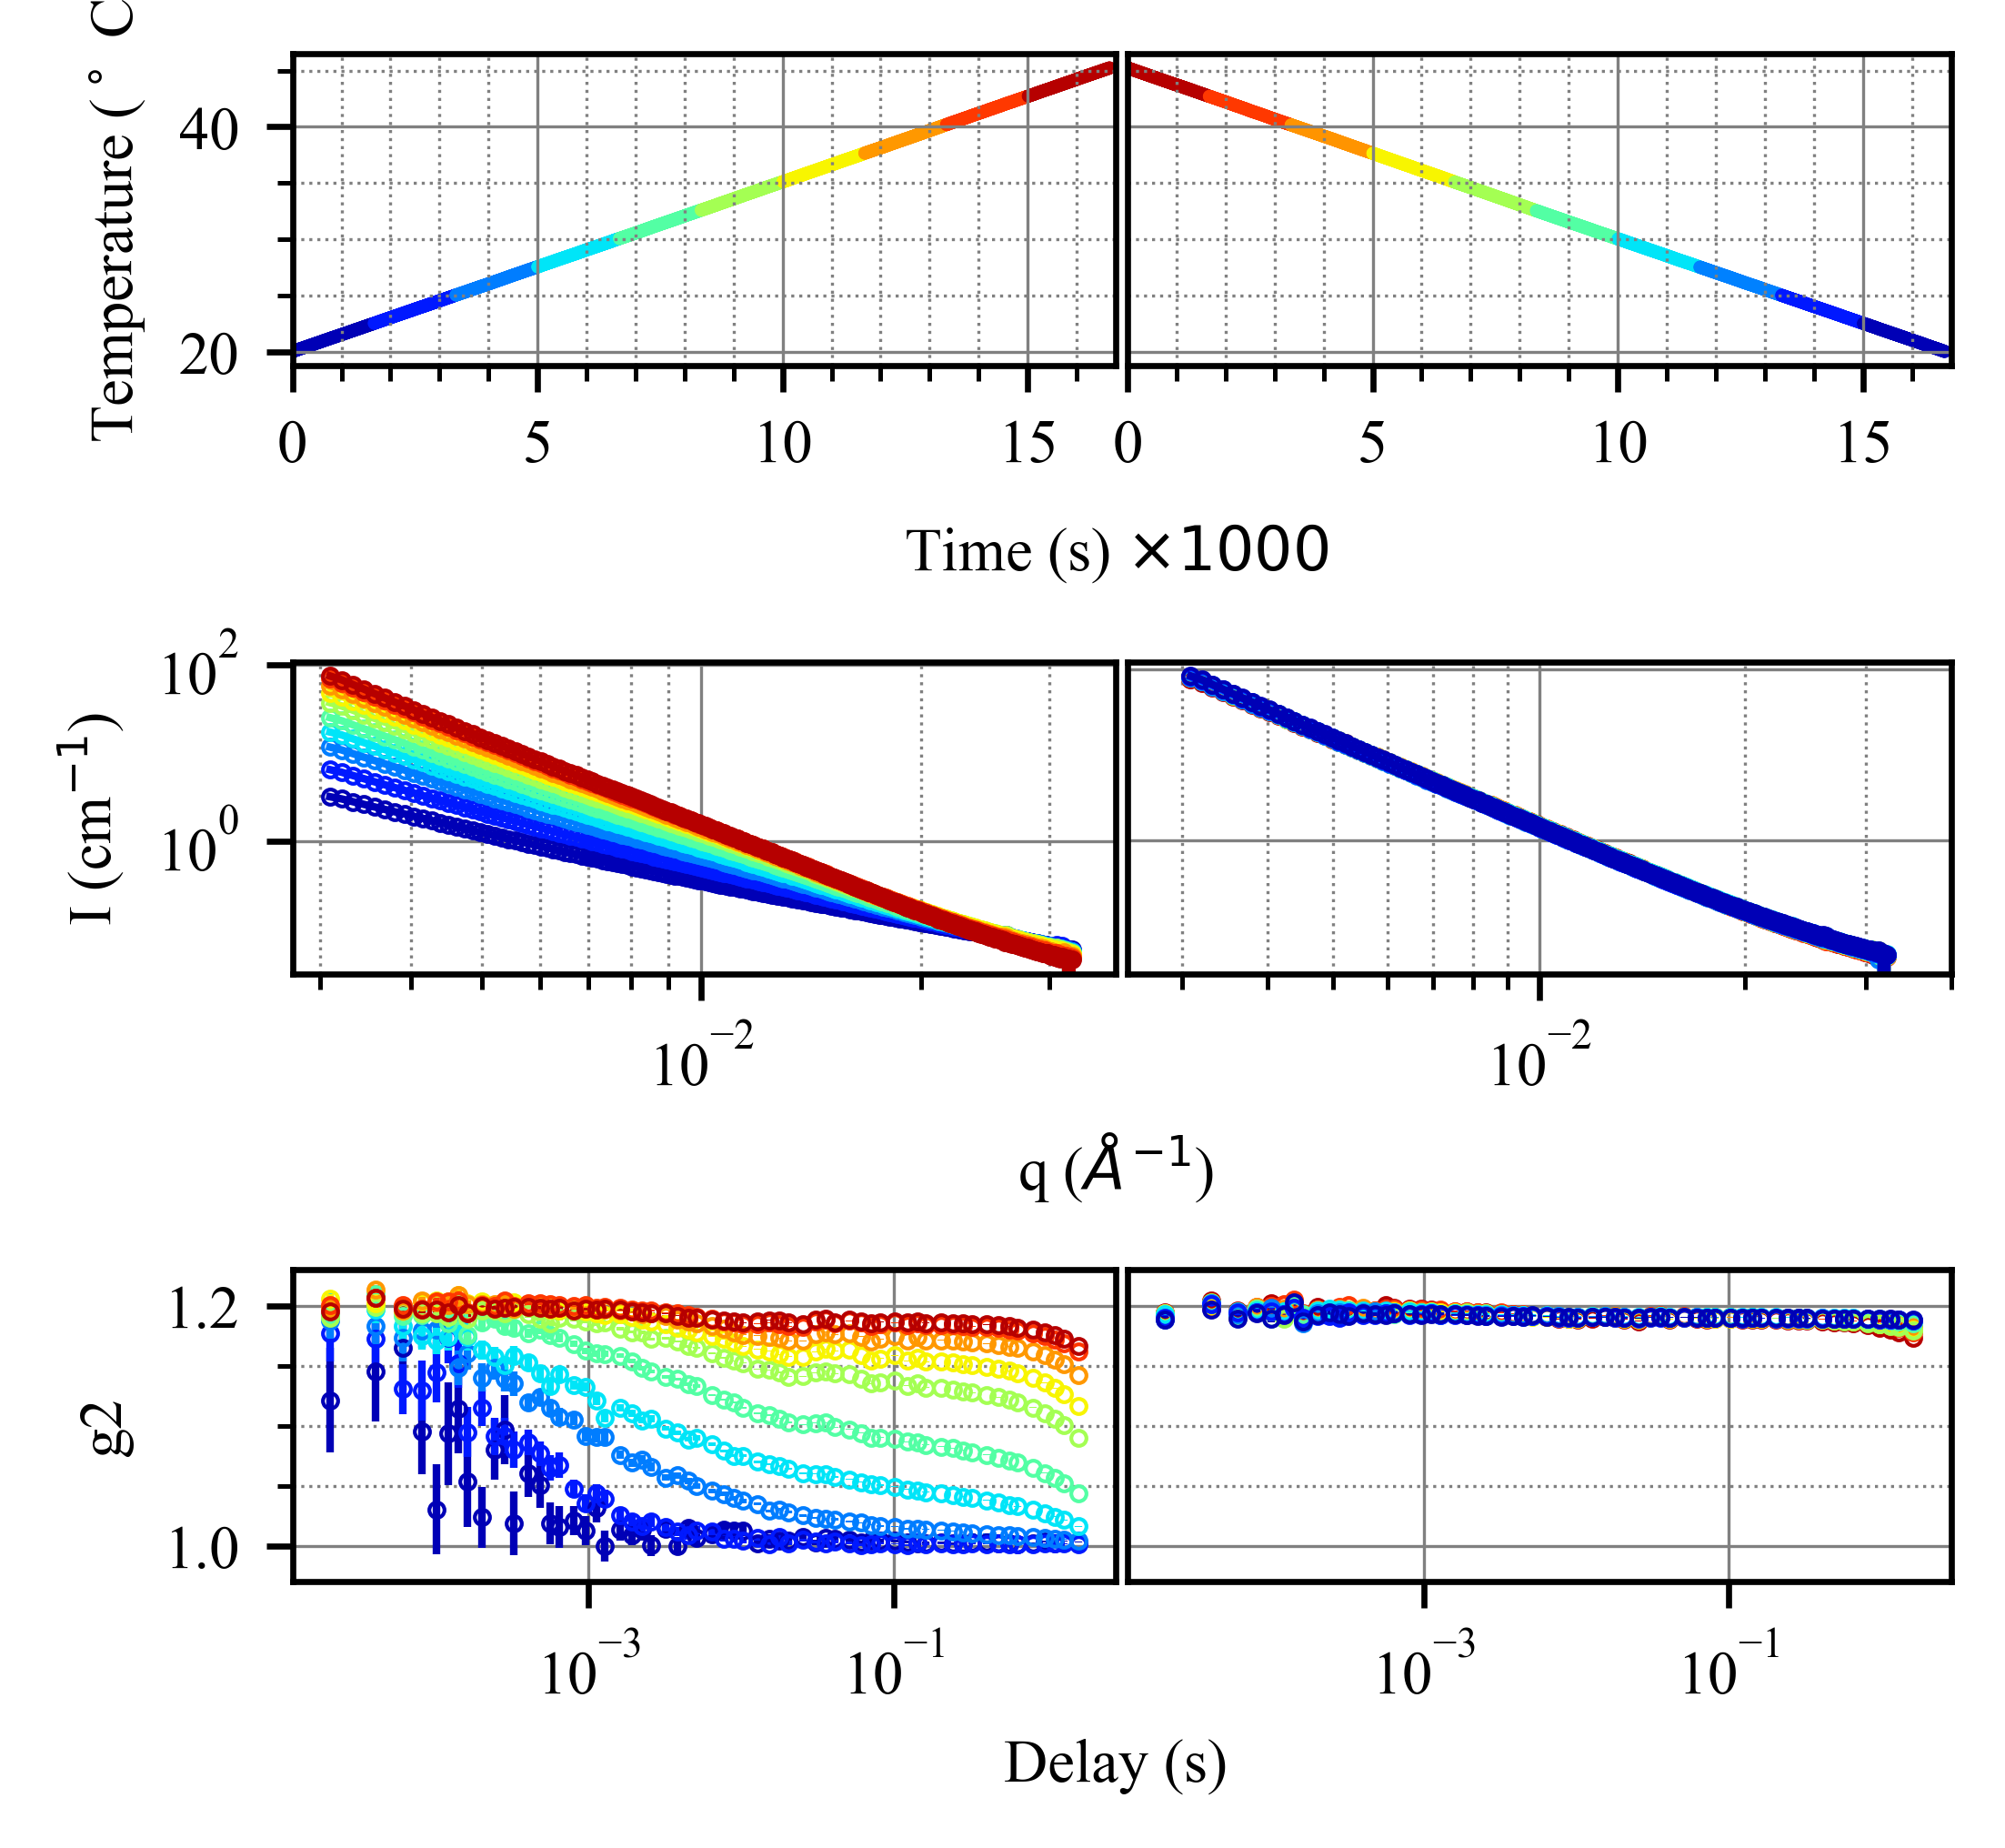

In [74]:
with open('checkpoint.pickle', 'rb') as f:
    avg_ramp_up = pickle.load(f)
    avg_ramp_down = pickle.load(f)
    t_el = pickle.load(f)
    ql_sta = pickle.load(f)
    ql_dyn = pickle.load(f)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 600

fig, ax = plt.subplots(3, 2, figsize=(3.8, 4.0))
# for n in range(3):
#     ax[n, 1].get_yaxis().set_visible(True)

def plot_one_column(ax, avg_data_list, second_column=False, g2_idx=0):
    total_size = 0
    for avg_dict in avg_data_list:
        total_size += len(avg_dict['temperature_x'])

    if second_column:
        cmap = plt.get_cmap('jet_r')
    else:
        cmap = plt.get_cmap('jet')
    
    accu_size = 0
    for avg_dict in avg_data_list:
        curr_size = len(avg_dict['temperature_x'])
        idx = accu_size + np.arange(curr_size) * 1.0
        idx /= total_size
        accu_size += curr_size

        ax[0].scatter(avg_dict['temperature_x'] * 6 / 1000, avg_dict['temperature'], 
                      c=cmap(np.ones_like(idx)*np.mean(idx)), s=0.5)

        color = cmap(np.mean(idx))
        ax[1].loglog(ql_sta[:-15], avg_dict['saxs_1d'][:-15], 'o-', color=color, lw=1, ms=2, mew=0.5, mfc='none')
        
        ax[2].errorbar(t_el, avg_dict['g2'][:, g2_idx],  yerr=avg_dict['g2_err'][:, g2_idx],
                       fmt='o', color=color, lw=1, ms=2, mew=0.5, mfc='none')
        
    ax[2].set_ylim(0.97, 1.23)
    
    if not second_column:
        ax[0].set_ylabel('Temperature ($^\circ$ C)')
        ax[1].set_ylabel('I (cm$^{-1}$)')
        ax[2].set_ylabel('g2')
        plt.subplots_adjust(left=0.15)

        ax[0].set_xlabel('Time (s) $\\times 1000$')
        ax[1].set_xlabel('q ($\\AA^{-1}$)')
        ax[2].set_xlabel('Delay (s)')
        ax[0].xaxis.set_label_coords(1.0, -0.5)
        ax[1].xaxis.set_label_coords(1.0, -0.5)
        ax[2].xaxis.set_label_coords(1.0, -0.5)

        # Add gray grid lines and minor ticks for the first and third row
        ax[0].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[0].minorticks_on()
        ax[0].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
        ax[1].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[1].minorticks_on()
        ax[1].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')

        ax[2].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[2].minorticks_on()
        ax[2].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
        plt.subplots_adjust(left=0.15, right=0.95, bottom=0.2, top=0.9)

    ax[0].set_xlim(0, 16.8)
    ax[2].set_xscale('log')

    if second_column:
        ax[1].set_xlim(2.5e-3, 4e-2)
        # ax[1].set_xlabel('q ($\\AA^{-1}$)')  # Move the xlabel to the second column
        
        # Add gray grid lines and minor ticks for the second column of the first and third rows
        ax[0].tick_params(axis='y', labelleft=False)
        ax[1].tick_params(axis='y', labelleft=False)
        ax[2].tick_params(axis='y', labelleft=False)

        ax[0].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[0].minorticks_on()
        ax[0].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
        ax[0].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

        ax[1].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[1].minorticks_on()
        ax[1].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
        ax[1].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
        
        ax[2].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[2].minorticks_on()
        ax[2].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
        ax[2].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# Adjusted w_pad for better layout
plt.tight_layout(w_pad=-3.3, h_pad=4.0)

# Apply the x-axis limit adjustment only to the second row
plot_one_column(ax[:, 0], avg_ramp_up)
plot_one_column(ax[:, 1], avg_ramp_down, second_column=True)
 
plt.savefig('H02.pdf')
